Importing the libraries etc.

In [40]:
####Importing libraries and dowloading iris data set
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import sklearn
from sklearn.datasets import load_iris
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
#Define the col names
colnames=["sepal_length_in_cm", "sepal_width_in_cm","petal_length_in_cm","petal_width_in_cm", "class"]
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = None, names= colnames )
df= df.replace({"class":  {"Iris-setosa":1,"Iris-versicolor":2, "Iris-virginica":3}})
#Visualize the new dataset
print(df.head())


   sepal_length_in_cm  sepal_width_in_cm  ...  petal_width_in_cm  class
0                 5.1                3.5  ...                0.2      1
1                 4.9                3.0  ...                0.2      1
2                 4.7                3.2  ...                0.2      1
3                 4.6                3.1  ...                0.2      1
4                 5.0                3.6  ...                0.2      1

[5 rows x 5 columns]


In [9]:
df.describe()

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,2.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,1.000000
50%,5.800000,3.000000,4.350000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,7.900000,4.400000,6.900000,2.500000,3.000000


Data analysis and manipulation. The iris data set is pretty clean and less manipulation is needed.

Text(0.5, 1.0, 'Iris correlation')

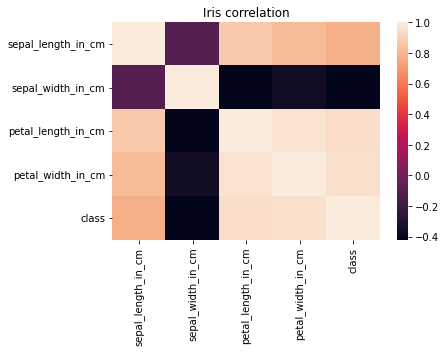

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(1)
sns.heatmap(df.corr())
plt.title('Iris correlation')
#Heatmap

<Figure size 432x288 with 0 Axes>

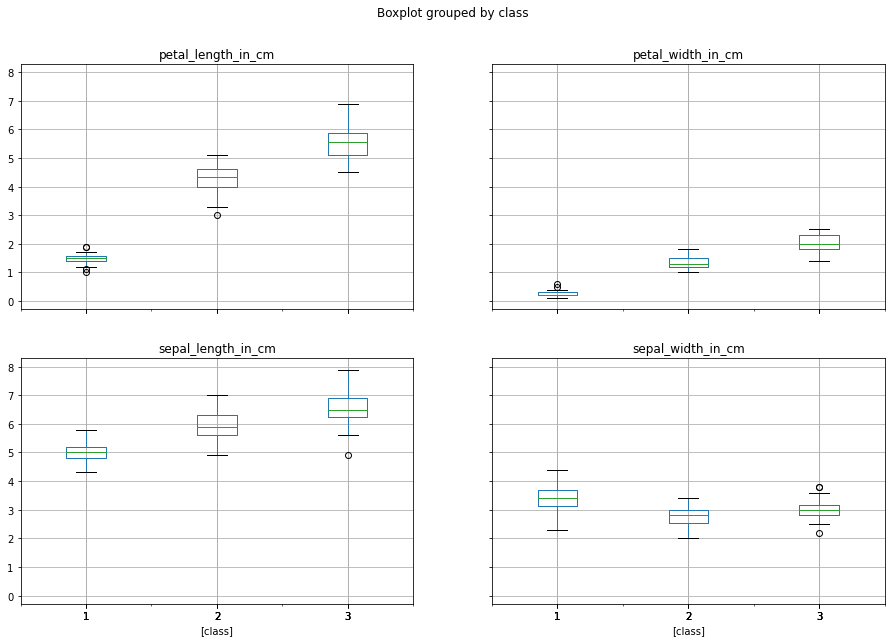

In [13]:
#Box plot of all the features
plt.figure()
df.boxplot(by="class", figsize=(15, 10))
plt.show()

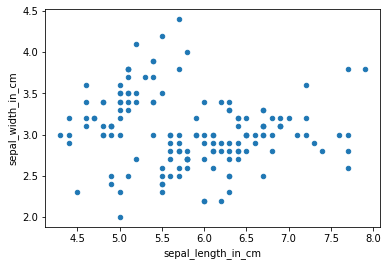

In [48]:
df.plot(kind="scatter", x="sepal_length_in_cm", y="sepal_width_in_cm")

Splitting the data into testing and training sets.

In [14]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1].values

Linear SVM


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
from sklearn.svm import SVC
SVMlinear_classifier = SVC(kernel = 'linear', random_state = 0)
#Fitting the model for the data
model=SVMlinear_classifier.fit(X_train, y_train)
#Predicting
y_pred = SVMlinear_classifier.predict(X_test)

Accuracy and RMSE of the SVM Linear Classification model

In [17]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = SVMlinear_classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print ('RMSE', model.score(X_train,y_train))

Accuracy: 98.18 %
Standard Deviation: 3.64 %
RMSE 0.9821428571428571


GridSearchSV for SVM Hyperparameters

In [18]:
from sklearn.model_selection import GridSearchCV
gridparams = {'C':[0.1,1,10,100], 'gamma':[1,0.1,0.01,0.001]}
grid = GridSearchCV(SVC(), gridparams, refit = True, verbose=3)
grid.fit(X_train, y_train)
gridpred = grid.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, gridpred))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=1.000, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.913, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=1.000, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.909, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.955, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.913, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ...........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................... C=1, gamma=0.001, score=0.727, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] ....................... C=10, gamma=1, score=0.957, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] ....................... C=10, gamma=1, score=0.957, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] ....................... C=10, gamma=1, score=1.000, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] ....................... C=10, gamma=1, score=0.864, total=   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] ....................... C=10, gamma=1, score=0.955, total=   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] ..................... C=10, gamma=0.1, score=1.000, total=   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    0.4s finished


RBF Kernel functions.

[0.9400000000000001, 0.9533333333333334, 0.96, 0.9733333333333334, 0.9800000000000001]


Text(0, 0.5, 'Cross-Validated Accuracy')

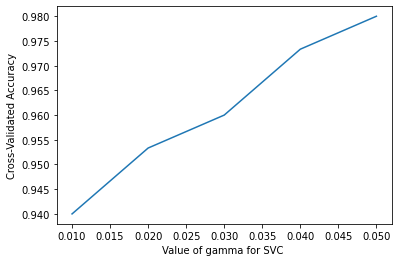

In [19]:
gamma_range=[0.01,0.02,0.03,0.04,0.05]
acc_score=[]
for g in gamma_range:
    svc = SVC(kernel='rbf', gamma=g)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    
import matplotlib.pyplot as plt
%matplotlib inline

gamma_range=[0.01,0.02,0.03,0.04,0.05]

# plotting the graph of gamma vs accuracy
plt.plot(gamma_range,acc_score)
plt.xlabel('Value of gamma for SVC ')
plt.ylabel('Cross-Validated Accuracy')

For the given set of gamma ranges the accurqacy score is proportional to the value of gamma.

K-Nearest Neighbours

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
df.groupby('class').size()
X = df[colnames].values
y = df['class'].values
KNN_classifier = KNeighborsClassifier(n_neighbors=9)
#Model fitting
KNN_classifier.fit(X_train, y_train)
# Predictiion
y_pred = KNN_classifier.predict(X_test)
#Accuracy of our model
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy is ' + str(round(accuracy, 2)) + ' %.')

Accuracy is 97.37 %.


RandomizedSearchCV

In [45]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_iris
iris = load_iris()
X=iris.data
y=iris.target
k_range=list(range(1,31))
options=['uniform', 'distance']
param_dist = dict(n_neighbors=k_range, weights=options)
knn = KNeighborsClassifier(n_neighbors = 1)
rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=5)
rand.fit(X, y)
print(rand.best_score_)
print(rand.best_params_)
best_scores=[]
for i in range(20):
    rand = RandomizedSearchCV(knn, param_dist, cv=10, scoring='accuracy', n_iter=10)
    rand.fit(X, y)
    best_scores.append(round(rand.best_score_,3))
print(best_scores)

0.9800000000000001
{'weights': 'uniform', 'n_neighbors': 18}
[0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.973, 0.973, 0.973, 0.973, 0.973, 0.98, 0.98, 0.98, 0.973, 0.98, 0.98, 0.973, 0.98]
